In [1]:
import pandas as pd
import django
import os
from asgiref.sync import sync_to_async

In [2]:
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "Ecommerce.settings")
django.setup()

In [3]:
from shop.models import Product    

In [4]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.all())

In [5]:
products = await retrieve_products_from_db()
len(products)

200

In [6]:
products[0].__dict__.keys()

dict_keys(['_state', 'id', 'name', 'slug', 'description', 'price', 'image', 'created', 'updated', 'category_id'])

In [7]:
filter_keys = ['name', 'slug', 'description', 'price']

In [8]:
products_list = []

for p in products:
    new_dict = { k: p.__dict__[k] for k in filter_keys }
    products_list.append(new_dict)

products_list

[{'name': 'Sosete ieftine',
  'slug': 'sosete-ieftine',
  'description': 'Foarte bune, pentru orice anotimp.',
  'price': Decimal('3.00')},
 {'name': 'Sosete scumpe',
  'slug': 'sosete-scumpe',
  'description': 'Nu sunt recomandate celor cu probleme dermatologice.',
  'price': Decimal('200.00')},
 {'name': 'Produs din linie de comanda',
  'slug': 'produs-din-linie-de-comanda',
  'description': 'python manage.py shell',
  'price': Decimal('10.00')},
 {'name': 'Produsul 90',
  'slug': 'produsul-90',
  'description': '',
  'price': Decimal('90.00')},
 {'name': 'Produsul 97',
  'slug': 'produsul-97',
  'description': '',
  'price': Decimal('97.00')},
 {'name': 'Produsul 43',
  'slug': 'produsul-43',
  'description': '',
  'price': Decimal('43.00')},
 {'name': 'Essence Mascara Lash Princess',
  'slug': 'essence-mascara-lash-princess',
  'description': 'The Essence Mascara Lash Princess is a popular mascara known for its volumizing and lengthening effects. Achieve dramatic lashes with this l

In [9]:
df = pd.DataFrame(products_list)

In [10]:
df["price"].max()

Decimal('36999.99')

In [11]:
df["price"].describe()

count       200
unique       82
top       19.99
freq         11
Name: price, dtype: object

In [12]:
df["price"].mean()

np.float64(1525.2148000000002)

In [13]:
df[df["price"] == df["price"].max()]

,name,slug,description,price
175,Durango SXT RWD,durango-sxt-rwd,The Durango SXT RWD is a spacious and versatil...,36999.99


In [14]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.select_related("category").values('name', 'slug', 'description', 'price', 'category__name'))

products = await retrieve_products_from_db()

In [19]:
pd.DataFrame(products)
df.rename(columns = {"category__name" : "category"})

,name,slug,description,price
0,Sosete ieftine,sosete-ieftine,"Foarte bune, pentru orice anotimp.",3.00
1,Sosete scumpe,sosete-scumpe,Nu sunt recomandate celor cu probleme dermatol...,200.00
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00
3,Produsul 90,produsul-90,,90.00
4,Produsul 97,produsul-97,,97.00
...,...,...,...,...
195,IWC Ingenieur Automatic Steel,iwc-ingenieur-automatic-steel,The IWC Ingenieur Automatic Steel watch is a d...,4999.99
196,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase watch is a masterp...,15999.99
197,Rolex Datejust Women,rolex-datejust-women,The Rolex Datejust Women's watch is an iconic ...,10999.99
198,Watch Gold for Women,watch-gold-for-women,The Gold Women's Watch is a stunning accessory...,799.99


In [20]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.select_related("category").values('name', 'slug', 'description', 'price', 'category__name'))

products = await retrieve_products_from_db()

In [21]:
products[0]

{'name': 'Sosete ieftine',
 'slug': 'sosete-ieftine',
 'description': 'Foarte bune, pentru orice anotimp.',
 'price': Decimal('3.00'),
 'category__name': 'Sosete'}

In [ ]:
pd.DataFrame(products)
df.rename(columns={"category__name" : "category"})

,name,slug,description,price
0,Sosete ieftine,sosete-ieftine,"Foarte bune, pentru orice anotimp.",3.00
1,Sosete scumpe,sosete-scumpe,Nu sunt recomandate celor cu probleme dermatol...,200.00
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00
3,Produsul 90,produsul-90,,90.00
4,Produsul 97,produsul-97,,97.00
...,...,...,...,...
195,IWC Ingenieur Automatic Steel,iwc-ingenieur-automatic-steel,The IWC Ingenieur Automatic Steel watch is a d...,4999.99
196,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase watch is a masterp...,15999.99
197,Rolex Datejust Women,rolex-datejust-women,The Rolex Datejust Women's watch is an iconic ...,10999.99
198,Watch Gold for Women,watch-gold-for-women,The Gold Women's Watch is a stunning accessory...,799.99


In [30]:
products[0]

{'name': 'Sosete ieftine',
 'slug': 'sosete-ieftine',
 'description': 'Foarte bune, pentru orice anotimp.',
 'price': Decimal('3.00'),
 'category__name': 'Sosete'}

# pip install seaborn

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

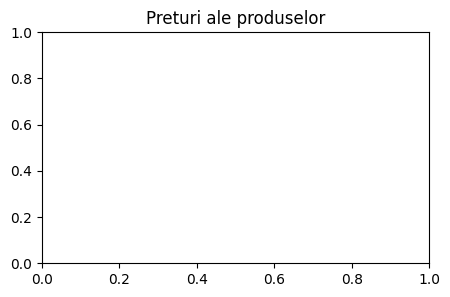

In [ ]:
plt.figure(figsize = (5, 3))
plt.title("Preturi ale produselor")
plt.show()

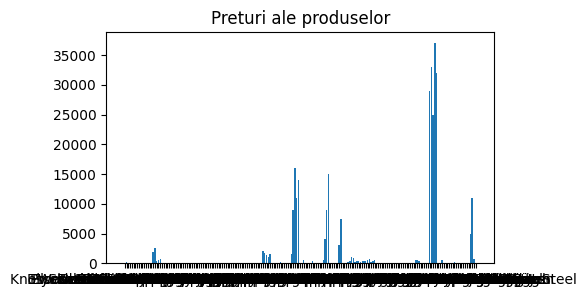

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(data = df, height = df["price"], x = df["name"])
plt.title("Preturi ale produselor")
plt.show()

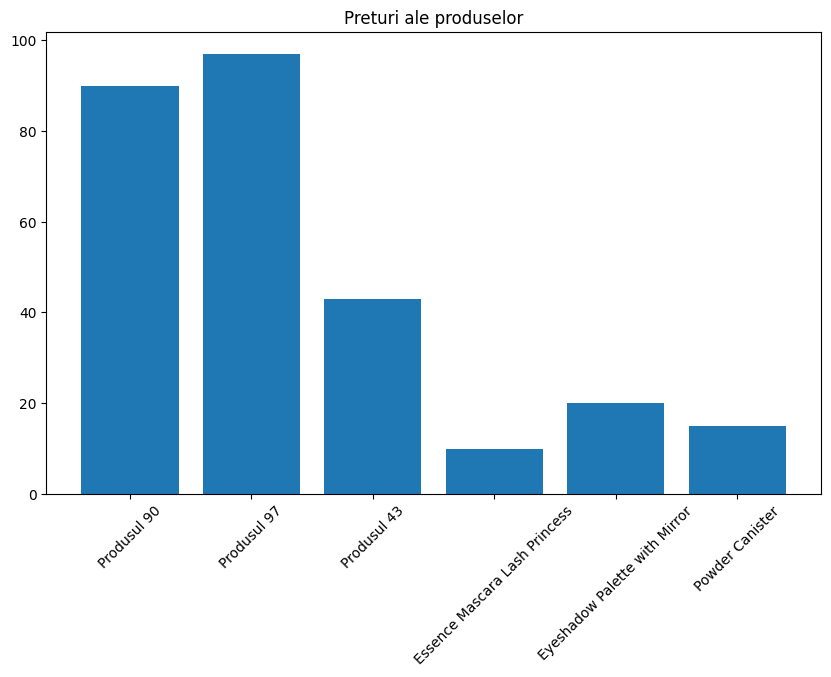

In [ ]:
sliced_df = df[3:9]

plt.figure(figsize=(10, 6))
plt.bar(data = sliced_df, height = sliced_df["price"], x = sliced_df["name"])
plt.xticks(rotation = 45)
plt.title("Preturi ale produselor")
plt.show()

C:\Users\Stelian DRAGNE\AppData\Local\Temp\ipykernel_16684\2480192837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sliced_df, x = "name", y = "price", palette = "pastel")


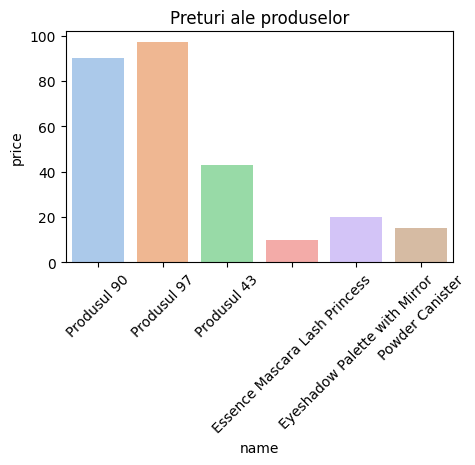

In [49]:
sliced_df = df[3:9]

plt.figure(figsize=(5, 3))
sns.barplot(data = sliced_df, x = "name", y = "price", palette = "pastel")
plt.xticks(rotation = 45)
plt.title("Preturi ale produselor")
plt.show();

C:\Users\Stelian DRAGNE\AppData\Local\Temp\ipykernel_16684\2450722240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sliced_df, x = "name", y = "price", palette = "muted")


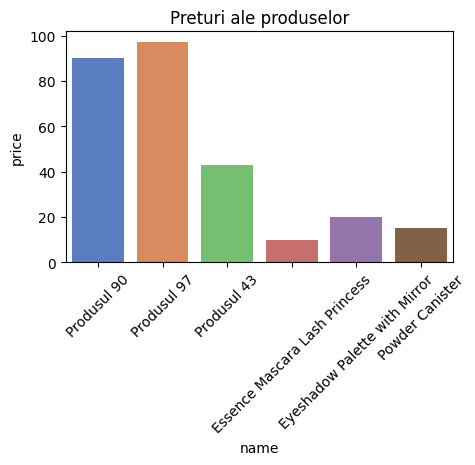

In [50]:
sliced_df = df[3:9]

plt.figure(figsize=(5, 3))
sns.barplot(data = sliced_df, x = "name", y = "price", palette = "muted")
plt.xticks(rotation = 45)
plt.title("Preturi ale produselor")
plt.show();

C:\Users\Stelian DRAGNE\AppData\Local\Temp\ipykernel_16684\3470794970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sliced_df, x = "name", y = "price", palette = "dark")


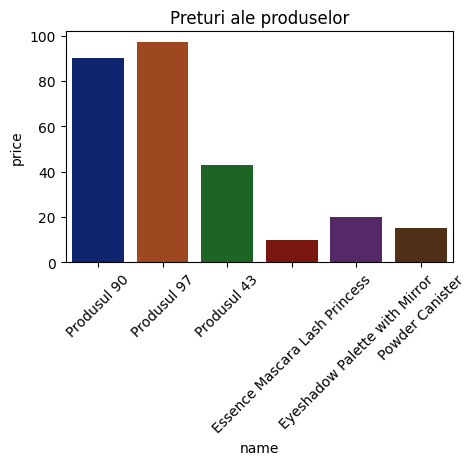

In [51]:
sliced_df = df[3:9]

plt.figure(figsize=(5, 3))
sns.barplot(data = sliced_df, x = "name", y = "price", palette = "dark")
plt.xticks(rotation = 45)
plt.title("Preturi ale produselor")
plt.show();